Assignment B:
## Target
1. Download 50 (min) images each of people wearing hardhat, vest, mask and boots. 
2. Use these labels (same spelling and small letters):
    1. hardhat
    2. vest
    3. mask
    4. boots
3. Use this to annotate bounding boxes around the hardhat, vest, mask and boots.
4. Download JSON file. 
5. Describe the contents of this JSON file in FULL details (you don't need to describe all 10 instances, anyone would work). 
6. Refer to this tutorial . Find out the best total numbers of clusters. Upload link to your Colab File uploaded to GitHub.

## Description of Jason-
>1.Key: Example img_001.jpg116338. This is unique key (concatination of image name and image size) 
>2. filename: Name of the image file
>3. size: Size of image
>4. regions: It consists of shape_attributes and region_attributes (both described below)
>>1. shape_attributes: It is collection of attributes describing the bonding boxes. Below are the fields.
>>>1. name: There are 6 different options in vgg tool for region selection. As we have selected for rectanglur option, value is rect in jason file
>>>2. x: We consider origin as top left corner of image. x is horizontal distance of bounding box top left corner from origin (Image's top left) 
>>>3. y: We consider origin as top left corner of image. y is vertical distance of bounding box top left corner from origin (Image's top left) 
>>>4. width: Width of bounding box
>>>5. height: Height of bounding box
>>2. region_attributes: It consists of region_attributes. We have only one region attribute named class
>>>1. class: it is one of the four class values (hardhat, mask, boots, vest)
>5. file_attributes: We have not used this attribute and this is empty for all images.

### Cluster Number by K Means clustering Decided: 4


In [1]:
import pandas as pd
import numpy as np
import json
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load JSON and prepare Data Frame

In [2]:
df = pd.read_json('s12_dataset.json').T

In [3]:
# Check header
df.index = np.arange(0, len(df))
df.head()

,filename,size,regions,file_attributes
0,img_001.jpg,116338,"[{'shape_attributes': {'name': 'rect', 'x': 70...",{}
1,img_002.jpg,204699,"[{'shape_attributes': {'name': 'rect', 'x': 76...",{}
2,img_003.jpg,66270,"[{'shape_attributes': {'name': 'rect', 'x': 49...",{}
3,img_004.jpg,12112,"[{'shape_attributes': {'name': 'rect', 'x': 13...",{}
4,img_005.jpg,325017,"[{'shape_attributes': {'name': 'rect', 'x': 88...",{}


In [4]:
# Convert into multiple rows for regions columns
df = df.explode('regions')
df.reset_index(inplace=True,drop=True)

In [5]:
df.drop(df.columns[[1, 3]], axis = 1, inplace = True)

In [6]:
attrs = pd.DataFrame(pd.DataFrame(df['regions'].tolist())['shape_attributes'].tolist()).copy()
attrs.drop(attrs.columns[[0]], axis = 1, inplace = True)

In [7]:
classes = pd.DataFrame(pd.DataFrame(df['regions'].tolist())['region_attributes'].tolist()).copy()

## Create one-hot encoding for classes

In [8]:
classes = pd.get_dummies(classes)

In [9]:
df = pd.concat((df['filename'],attrs,classes),1)

## Get image dimentions

In [10]:
def get_image_dims(folder_path):
    """Get image dimentions"""
    filenames = os.listdir(folder_path)
    csv_contents = [["filename","widht","height"]]
    for fl in filenames:
        img = Image.open(os.path.join(folder_path, fl))
        w, h = img.size
        csv_contents.append([fl, w, h])
    img_size = pd.DataFrame(csv_contents)
    return(img_size)

In [11]:
path = r'.\DataSet'

In [12]:
filenames = os.listdir(path)

In [13]:
img_dim= []
for fl in filenames:
    img = Image.open(os.path.join(path, fl))
    w, h = img.size
    img_dim.append([fl, w, h])

In [14]:
img_dim = pd.DataFrame(img_dim, columns=['filename','img_width', 'img_height'])

## Merge dimentions with dataframe 

In [15]:
df = df.merge(img_dim, how='outer', on='filename')

In [16]:
col_names = ['filename', 'img_width', 'img_height', 'x', 'y', 'width', 'height', 'class_boots', 'class_hardhat',
       'class_mask', 'class_vest']
df = df.reindex(columns=col_names)

In [17]:
df.rename(columns = {'x': 'bb_x', 'y': 'bb_y', 'width': 'bb_width', 'height': 'bb_height'}, inplace = True)

## Check Data Frame

In [18]:
df

,filename,img_width,img_height,bb_x,bb_y,bb_width,bb_height,class_boots,class_hardhat,class_mask,class_vest
0,img_001.jpg,1125,632,706,47,286,189,0,1,0,0
1,img_001.jpg,1125,632,593,434,524,195,0,0,0,1
2,img_002.jpg,1600,1168,762,222,203,213,0,0,1,0
3,img_003.jpg,1024,683,498,281,130,95,0,0,1,0
4,img_004.jpg,225,225,132,119,53,40,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
254,img_108.jpg,300,168,229,38,69,47,1,0,0,0
255,img_109.jpg,262,192,77,92,47,64,1,0,0,0
256,img_109.jpg,262,192,20,124,25,32,1,0,0,0
257,img_110.jpg,780,500,318,104,132,181,1,0,0,0


## Normalize image and bounding box width and height

In [19]:
df['img_width_n']  = df['img_width'].div(df['img_width'])
df['img_height_n'] = df['img_height'].div(df['img_height'])
df['bb_width_n']     = df['bb_width'].div(df['img_width'])
df['bb_height_n']    = df['bb_height'].div(df['img_height'])

df.head()

,filename,img_width,img_height,bb_x,bb_y,bb_width,bb_height,class_boots,class_hardhat,class_mask,class_vest,img_width_n,img_height_n,bb_width_n,bb_height_n
0,img_001.jpg,1125,632,706,47,286,189,0,1,0,0,1.0,1.0,0.254222,0.299051
1,img_001.jpg,1125,632,593,434,524,195,0,0,0,1,1.0,1.0,0.465778,0.308544
2,img_002.jpg,1600,1168,762,222,203,213,0,0,1,0,1.0,1.0,0.126875,0.182363
3,img_003.jpg,1024,683,498,281,130,95,0,0,1,0,1.0,1.0,0.126953,0.139092
4,img_004.jpg,225,225,132,119,53,40,0,0,1,0,1.0,1.0,0.235556,0.177778


## Select normalized bounding box width and height for plot

In [20]:
table_for_algo = df[df.columns[len(df.columns)-2:]]
table_for_algo.head()

,bb_width_n,bb_height_n
0,0.254222,0.299051
1,0.465778,0.308544
2,0.126875,0.182363
3,0.126953,0.139092
4,0.235556,0.177778


Text(0, 0.5, 'Bounding Box Height (Norm)')

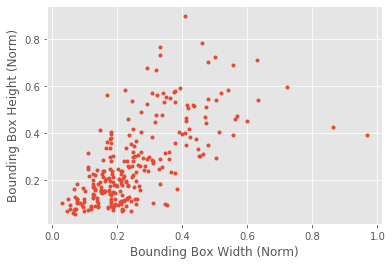

In [22]:
plt.style.use('ggplot')
plt.plot(table_for_algo['bb_width_n'],table_for_algo['bb_height_n'],'.')
plt.xlabel('Bounding Box Width (Norm)')
plt.ylabel('Bounding Box Height (Norm)')

## K Means Clustering to find optimal number of clusters

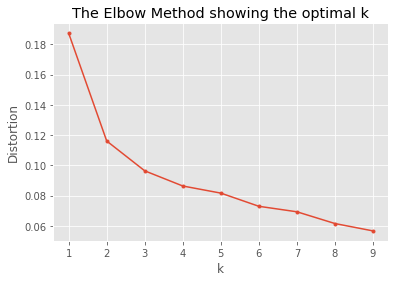

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(table_for_algo)
    kmeanModel.fit(table_for_algo)
    distortions.append(sum(np.min(cdist(table_for_algo, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /table_for_algo.shape[0])

# Plot the elbow
plt.style.use('ggplot')
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Calculate IoU

In [25]:
height = list(table_for_algo['bb_height_n'])
width  = list(table_for_algo['bb_width_n'])
ks = range(1,10)
meaniou = []
for k in ks:
    cl = KMeans(n_clusters=k)
    cl.fit(table_for_algo)
    cx = []
    cy = []
    mapcx  = {}
    mapcy = {}
    iou = []
    for i in range(259):
        l = cl.labels_[i]
        cx.append(cl.cluster_centers_[l][0])
        cy.append(cl.cluster_centers_[l][1])
        iou.append(min(width[i] ,cx[i])* min(height[i] , cy[i])/(height[i]*width[i]+ cx[i]*cy[i]- min(width[i] , cx[i])* min(height[i] ,cy[i])))
    meaniou.append(sum(iou)/50)

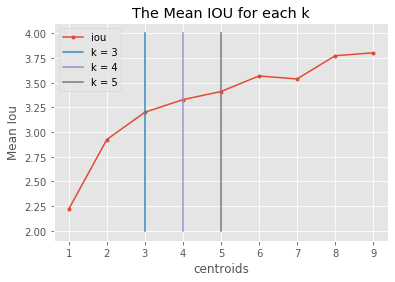

In [28]:
plt.style.use('ggplot')
plt.plot(range(1,10),meaniou,'.-',label = "iou")
plt.plot([3,3],[2,4],label = "k = 3")
plt.plot([4,4],[2,4],label = "k = 4")
plt.plot([5,5],[2,4],label = "k = 5")
plt.xlabel('centroids')
plt.ylabel('Mean Iou')
plt.title('The Mean IOU for each k')
plt.legend()
plt.show()

In [29]:
meaniou[3],meaniou[4],meaniou[5],meaniou[6]

(3.328210463033767, 3.4104078449453215, 3.567718122452308, 3.537545367791109)

## K Means with K = 3

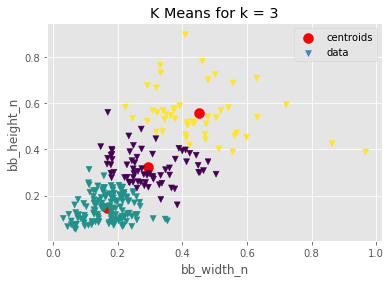

In [30]:
array_points = np.array(table_for_algo)
cl3 = KMeans(3)
cl3.fit(array_points)

plt.style.use('ggplot')
plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_algo['bb_width_n']), list(table_for_algo['bb_height_n']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bb_width_n')
plt.ylabel('bb_height_n')
plt.title('K Means for k = 3')
plt.legend()
plt.show()

## K Means with K = 4

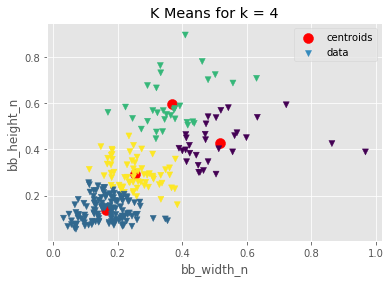

In [31]:
# array_points = np.array(table_for_algo)
cl3 = KMeans(4)
cl3.fit(array_points)

plt.style.use('ggplot')
plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_algo['bb_width_n']), list(table_for_algo['bb_height_n']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bb_width_n')
plt.ylabel('bb_height_n')
plt.title('K Means for k = 4')
plt.legend()
plt.show()

## K Means with K = 5

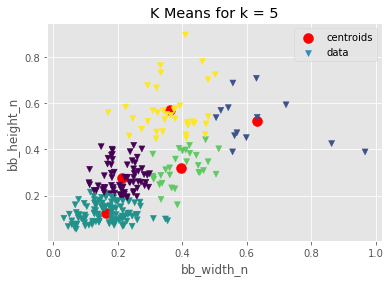

In [32]:
# array_points = np.array(table_for_algo)
cl3 = KMeans(5)
cl3.fit(array_points)

plt.style.use('ggplot')
plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_algo['bb_width_n']), list(table_for_algo['bb_height_n']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bb_width_n')
plt.ylabel('bb_height_n')
plt.title('K Means for k = 5')
plt.legend()
plt.show()